# Telecom Churn Case Study Hackathon

# 1. Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

# 2. Business Objectives

Predict churning customers for a Telecom company based on temporal behaviour

# 3. IMPORT LIBRARIES AND DATASETS

In [1]:
# import package
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3.1. Data Loading and Description

- **train.csv** - Contains 172 columns. The primary key that represents each customer is id. The target variable that you need to predict is churn_probability which contains a value of 0 or 1. This data is what you are going to use for EDA, cleaning, feature engineering, model building, model evaluation, model selection, and finally model training.
- **test.csv** - Contains 171 columns, doesn't contain the target variable churn_probability. You will apply all the necessary preprocessing steps to get this data into the right format and then use the model trained using the train.csv file to make predictions with this. This is unseen data! Only the competition hosts know the actual values of the target feature for this data and therefore your submissions will be evaluated on how well your model does with this dataset.
- **sample.csv** - This contains the format in which you need to submit the solutions to Kaggle. The id column in this dataset exactly the same as the id column in test.csv. You will make your predictions on the test.csv data and store them in a submission file that has the same format as this file. Check the Overview>Evaluation tab for mode details.
- **Data Dictionary** - This contains the definitions for the various acronyms that you will need to understand each variable. For example, the variable total_og_mou_7, contains the acronyms total, og, mou, and 7, which can be translated as the total outgoing minutes of voice calls made by the user in month of July.

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset – rows and columns – that’s what we find out with the method shape.

In [3]:
df = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c42/train.csv")

In [4]:
df.sample(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
61866,61866,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,184.782,0.000,44.560,17.76,NaN,2.41,324.93,NaN,126.39,0.0,NaN,0.0,0.0,NaN,0.0,17.76,NaN,2.41,15.31,NaN,0.00,0.0,NaN,0.00,0.00,NaN,0.0,33.08,NaN,2.41,0.00,NaN,0.00,309.61,NaN,126.39,0.0,NaN,0.0,0.0,NaN,0.0,309.61,NaN,126.39,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,342.69,0.00,128.81,7.29,NaN,2.81,14.03,NaN,1.23,0.00,NaN,0.00,21.33,NaN,4.04,0.00,NaN,0.00,0.03,NaN,1.31,0.0,NaN,0.0,0.0,NaN,0.0,0.03,NaN,1.31,21.36,0.00,5.84,0.00,NaN,0.48,0.00,NaN,0.0,0.00,NaN,0.00,7,5,0,200,0,0,90,0,0,6/25/2014,7/31/2014,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,402,0.0,0.0,0.0,1
23699,23699,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,184.787,183.610,185.853,6.41,0.18,16.11,57.96,23.06,34.58,0.0,0.0,0.0,0.0,0.0,0.0,6.41,0.18,16.11,38.69,11.29,34.58,0.0,0.0,0.00,5.51,0.00,0.0,45.11,11.48,50.69,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,20.21,11.76,0.40,0.00,0.0,0.0,65.33,23.24,51.09,7.00,26.09,36.99,42.29,20.06,12.44,0.00,0.00,0.00,49.29,46.16,49.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,49.64,46.34,49.44,0.00,0.18,0.00,0.00,0.00,0.0,0.35,0.0,0.00,5,10,3,195,238,194,155,154,154,6/30/2014,7/25/2014,8/26/2014,155,30,30,NaN,7/22/2014,8/16/2014,NaN,3.0,1.0,NaN,154.0,154.0,NaN,3.0,1.0,NaN,0

## 3.2. Data Understanding

In [5]:
df.shape

(69999, 172)

The dataset has __69999 rows and 172 columns.__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
# Get info from both data set to understand data in depths 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

We have following 9 Columns as object type
- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- date_of_last_rech_6
- date_of_last_rech_7
- date_of_last_rech_8
- date_of_last_rech_data_6
- date_of_last_rech_data_7
- date_of_last_rech_data_8

In [8]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

- The dataset comprises of 69999 observations of 172 columns. Above is a table showing names of all the columns and their description.
- There are no categorical value present in dataset, rest of columns are integer/float type.
- Also few columns have object type as date value which we can use to create a derive data from that

# 4. Data Engineering 

Below are the points that need to be addressed in this step:
1. Duplicates
2. Data validity check
3. Missing values
4. Outliers

## 4.1. Data Duplicates

The data may contain duplicate entries, which need to be removed in most of the applications.

In [9]:
duplicate_df = df[df.duplicated()]
duplicate_df.shape

(0, 172)

There are duplicates entrires present in traing dataset

## 4.2. Data validity check

Based on the features, need to validate the data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


We have arount 172 features. However there are 9 Columns as object type & might not useful for our analysis.

- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- date_of_last_rech_6
- date_of_last_rech_7
- date_of_last_rech_8
- date_of_last_rech_data_6
- date_of_last_rech_data_7
- date_of_last_rech_data_8

## 4.3. Missing values

- Based on the business, a missing value imputation needs to be chosen.
- If the data is normally distributed, mean imputation can be performed. If the mean and median difference is huge, median imputation is preferred.

In [11]:
# Checking more meta information about dataframe i.e. how many non-null, uniquie value.

def metadataInfo(dataframe) : 
    return pd.DataFrame({
                'Datatype' : dataframe.dtypes.astype(str), 
                'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                'Null_Count': dataframe.isnull().sum().astype(int), 
                'Null_Percentage': round(dataframe.isnull().sum()/len(dataframe) * 100 , 2), 
                'Unique_Values_Count': dataframe.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [12]:
new_df = metadataInfo(df)
print(new_df.to_string())

                         Datatype  Non_Null_Count  Null_Count  Null_Percentage  Unique_Values_Count
arpu_3g_6                 float64           17568       52431            74.90                 5506
count_rech_2g_6           float64           17568       52431            74.90                   30
night_pck_user_6          float64           17568       52431            74.90                    2
arpu_2g_6                 float64           17568       52431            74.90                 5389
date_of_last_rech_data_6   object           17568       52431            74.90                   30
total_rech_data_6         float64           17568       52431            74.90                   36
av_rech_amt_data_6        float64           17568       52431            74.90                  792
max_rech_data_6           float64           17568       52431            74.90                   47
count_rech_3g_6           float64           17568       52431            74.90                   23


There are so many __Null/NA__ value present in dataset which varies from 1% to 74%.
- Columns which have more that 60% __NULL/NA__ value, we will drop those since we might not more information from those colum
- However columns which have minimum Null value present and if the data is normally distributed in those, then mean imputation can be performed. If the mean and median difference is huge, median imputation is preferred on numerical data.
- Since we have few categorical data present, no need to perform Mode imputation on categorical data.

In [13]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


- We can create new feature as __total_rech_amt_data__ using __total_rech_data__ and __av_rech_amt_data__ to capture amount utilized by customer for data.
- Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [14]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

In [15]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [16]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [17]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
df[zero_impute].isnull().sum()*100/df.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [18]:
# now we can check the "statistics Summary"
df[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [19]:
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [20]:
# drop id and date columns
df = df.drop(id_cols + date_cols, axis=1)
#check the shape again
df.shape

(69999, 161)

In [21]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [22]:
# missing value ratio
df[cat_cols].isnull().sum()*100/df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [23]:
# Droping variables with more than 70% of missing values (we can call it as threshold )

initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True
159,jun_vbc_3g,True


In [24]:
# now we can drop  some more columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
dropped_cols

-12

In [25]:
#rechecking the shape of a dataframe
df.shape

(69999, 149)

In [26]:
# Let's have a look of the missing values for how many missing values has left
print(metadataInfo(df).to_string())

                   Datatype  Non_Null_Count  Null_Count  Null_Percentage  Unique_Values_Count
std_ic_t2t_mou_8    float64           66296        3703             5.29                 5367
spl_og_mou_8        float64           66296        3703             5.29                 3848
loc_og_t2c_mou_8    float64           66296        3703             5.29                 2204
loc_og_mou_8        float64           66296        3703             5.29                21950
std_og_t2t_mou_8    float64           66296        3703             5.29                14483
std_og_t2m_mou_8    float64           66296        3703             5.29                15968
std_og_t2f_mou_8    float64           66296        3703             5.29                 1945
std_og_t2c_mou_8    float64           66296        3703             5.29                    1
std_og_mou_8        float64           66296        3703             5.29                21745
isd_og_mou_8        float64           66296        3703     

In [27]:
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [28]:
#imputing with meadian for num_cols
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

In [29]:
print(metadataInfo(df).to_string())

                   Datatype  Non_Null_Count  Null_Count  Null_Percentage  Unique_Values_Count
loc_og_t2o_mou      float64           69999           0              0.0                    1
isd_ic_mou_7        float64           69999           0              0.0                 4640
ic_others_6         float64           69999           0              0.0                 1523
ic_others_7         float64           69999           0              0.0                 1658
ic_others_8         float64           69999           0              0.0                 1565
total_rech_num_6      int64           69999           0              0.0                   94
total_rech_num_7      int64           69999           0              0.0                   96
total_rech_num_8      int64           69999           0              0.0                   92
total_rech_amt_6      int64           69999           0              0.0                 2108
total_rech_amt_7      int64           69999           0     

Now we don't any null value present in dataset

## 4.4. Outliers

- Outliers can be valid outlier or data entry mistake. 
- Need to understand what kind of outlier the data contains. Based on the outlier type, the issue needs to be addressed.

# 6. Feature Engineering and Selection

- Feature engineering involves identifying the right drivers/features that affect the target variable and also deriving the new features based on existing features.
- Based on feature importance, some of the features can be removed from the data, which helps in reducing data size. 

## 6.1. Filter high-value customers

Here step to get high value customers.
- For comparing the data of good phase(6 and 7) with action phase (8), taking average usage of 6th and 7th month and deducting usage of 8th month.
- Positive value of the derived feature would mean - usage has dropped from good phase to action phase (i.e. average usage of 6th and 7th month > usage of 8th month)
- Negative value would mean usage has increased in action phase.

In [30]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [31]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [32]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [33]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [34]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

In [35]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = df.reset_index(drop=True)

In [36]:
churn_filtered.shape

(69999, 154)

In [37]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [38]:
churn_filtered.shape

(69999, 149)

Now we have __69,999__ rows and __149__ columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

Derive churn means hear we are using 8 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data) For that, we need to find the derive churn variable using total_ic_mou_8, total_og_mou_8, vol_2g_mb_8 and vol_3g_mb_8 attributes

In [39]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  69999 non-null  float64
 1   total_og_mou_8  69999 non-null  float64
 2   vol_2g_mb_8     69999 non-null  float64
 3   vol_3g_mb_8     69999 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


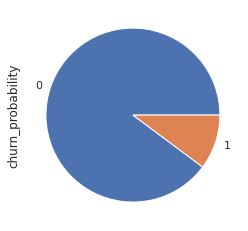

In [40]:
# lets find out churn/non churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(df))*100)
((churn_filtered['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

As we can see that 90% of the customers do not churn, there is a possibility of class imbalance
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.
We can still clean the data by few possible columns relating to the good phase.
As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [41]:
# Since we have derive data,  let's drop original column
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.
Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [42]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [43]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

fb_user_6           night_pck_user_6     0.971839
fb_user_7           night_pck_user_7     0.970696
fb_user_8           night_pck_user_8     0.969824
total_rech_amt_8    arpu_8               0.958333
isd_og_mou_8        isd_og_mou_7         0.947006
isd_og_mou_7        isd_og_mou_6         0.934022
isd_og_mou_8        isd_og_mou_6         0.924139
sachet_2g_8         total_rech_data_8    0.906113
total_ic_mou_6      loc_ic_mou_6         0.900539
total_ic_mou_8      loc_ic_mou_8         0.891455
total_ic_mou_7      loc_ic_mou_7         0.889104
std_og_t2t_mou_8    onnet_mou_8          0.863487
std_og_t2t_mou_7    onnet_mou_7          0.862711
std_ic_mou_7        std_ic_t2m_mou_7     0.859551
total_og_mou_8      std_og_mou_8         0.859070
std_og_t2m_mou_8    offnet_mou_8         0.858783
total_og_mou_7      std_og_mou_7         0.857000
std_og_t2m_mou_7    offnet_mou_7         0.856417
std_og_t2t_mou_6    onnet_mou_6          0.855852
std_ic_mou_8        std_ic_t2m_mou_8     0.855666


#### These columns can be dropped as they are highly collinered with other predictor variables criteria set is for collinearity of 85%

In [44]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [45]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(69999, 135)

We can derive new variables from column 'aon' to explain the data w.r.t churn.

In [46]:
# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

# 6. Exploratory Data Analysis 

This step gives more insights into the data and how the data is related to the target variable. This step involves mainly:
1. Uni-variate analysis
2. Bi-variate/Multi-variate analysis
3. Pivots
4. Visualization and Data Insights

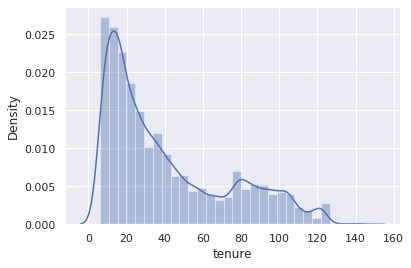

In [47]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [48]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

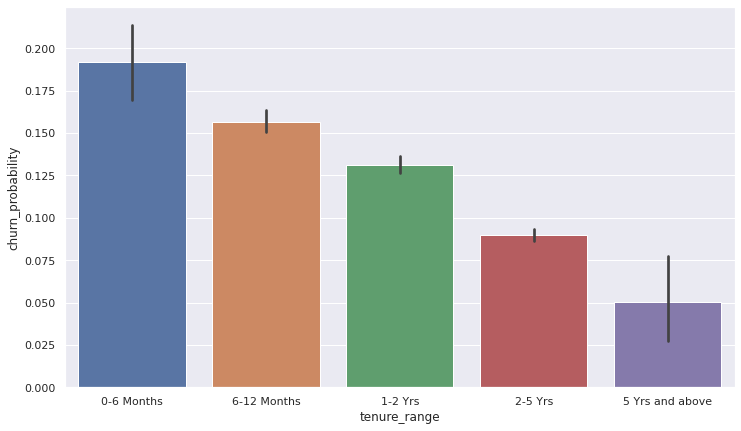

In [49]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_filtered)
plt.show()

- It can be seen that the maximum churn rate happens within __0-6 month__, but it gradually decreases as the customer retains in the network.

- The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [50]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0     59.1430
1     61.3935
2     81.9910
3    180.8110
4    184.4495
Name: avg_arpu_6_7, dtype: float64

In [51]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(69999, 135)

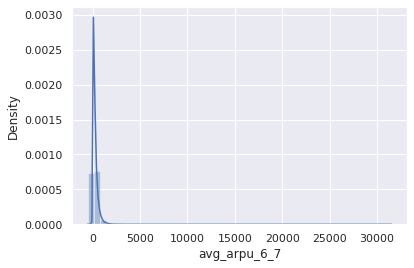

In [52]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

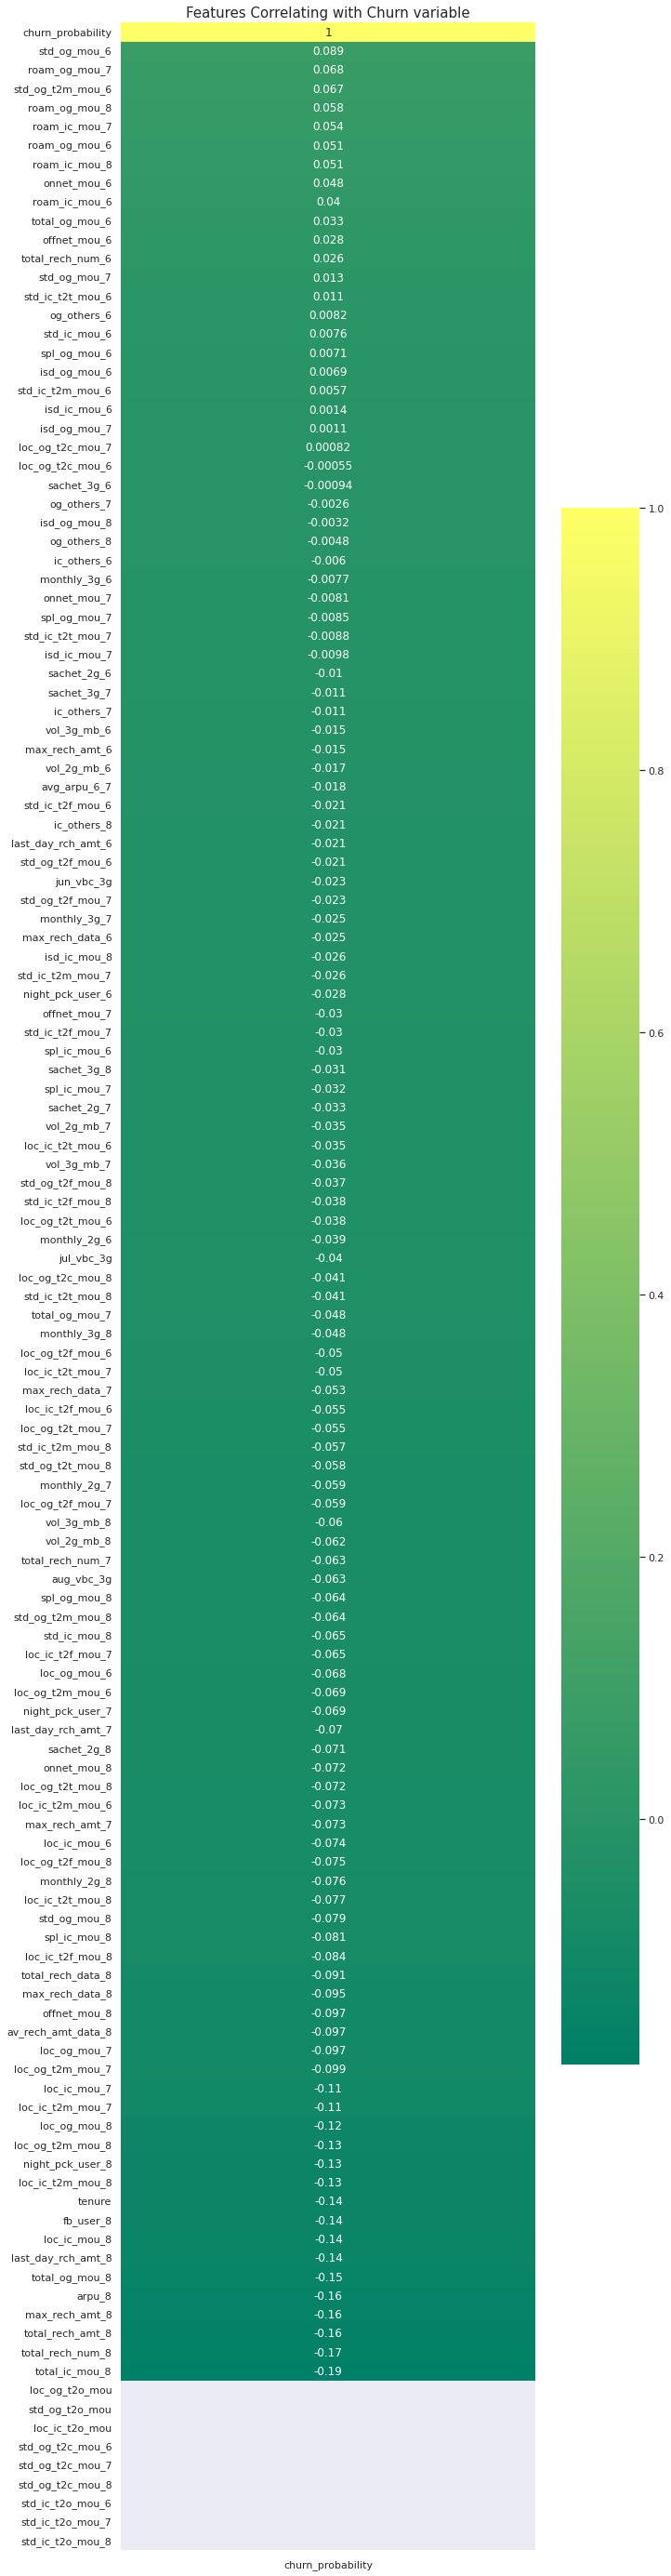

In [53]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

- Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
- Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

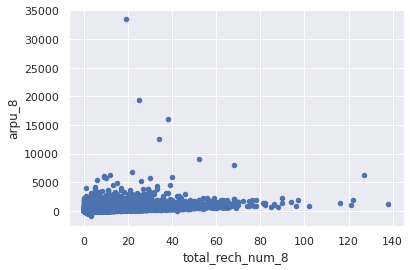

In [54]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

In [55]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 No_Recharge        51582
<=10_Recharges     17889
10-25_Recharges      494
>25_Recharges         34
Name: total_rech_data_group_8, dtype: int64


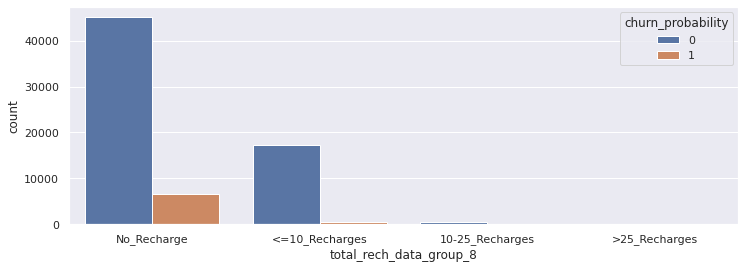

					Distribution of total_rech_num_8 variable
 <=10_Recharges     53312
10-25_Recharges    12266
No_Recharge         2461
>25_Recharges       1960
Name: total_rech_num_group_8, dtype: int64


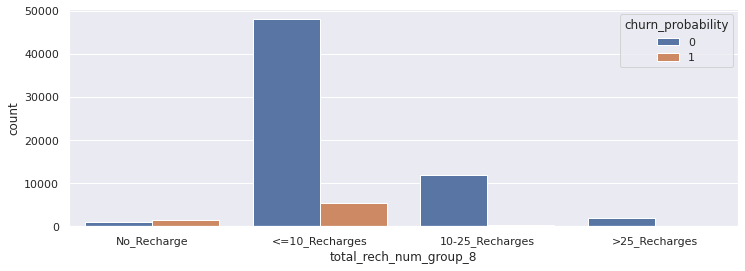

In [56]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

#### As the number of recharge rate increases, the churn rate decreases clearly.

In [57]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [58]:
churn_filtered.shape

(69999, 127)

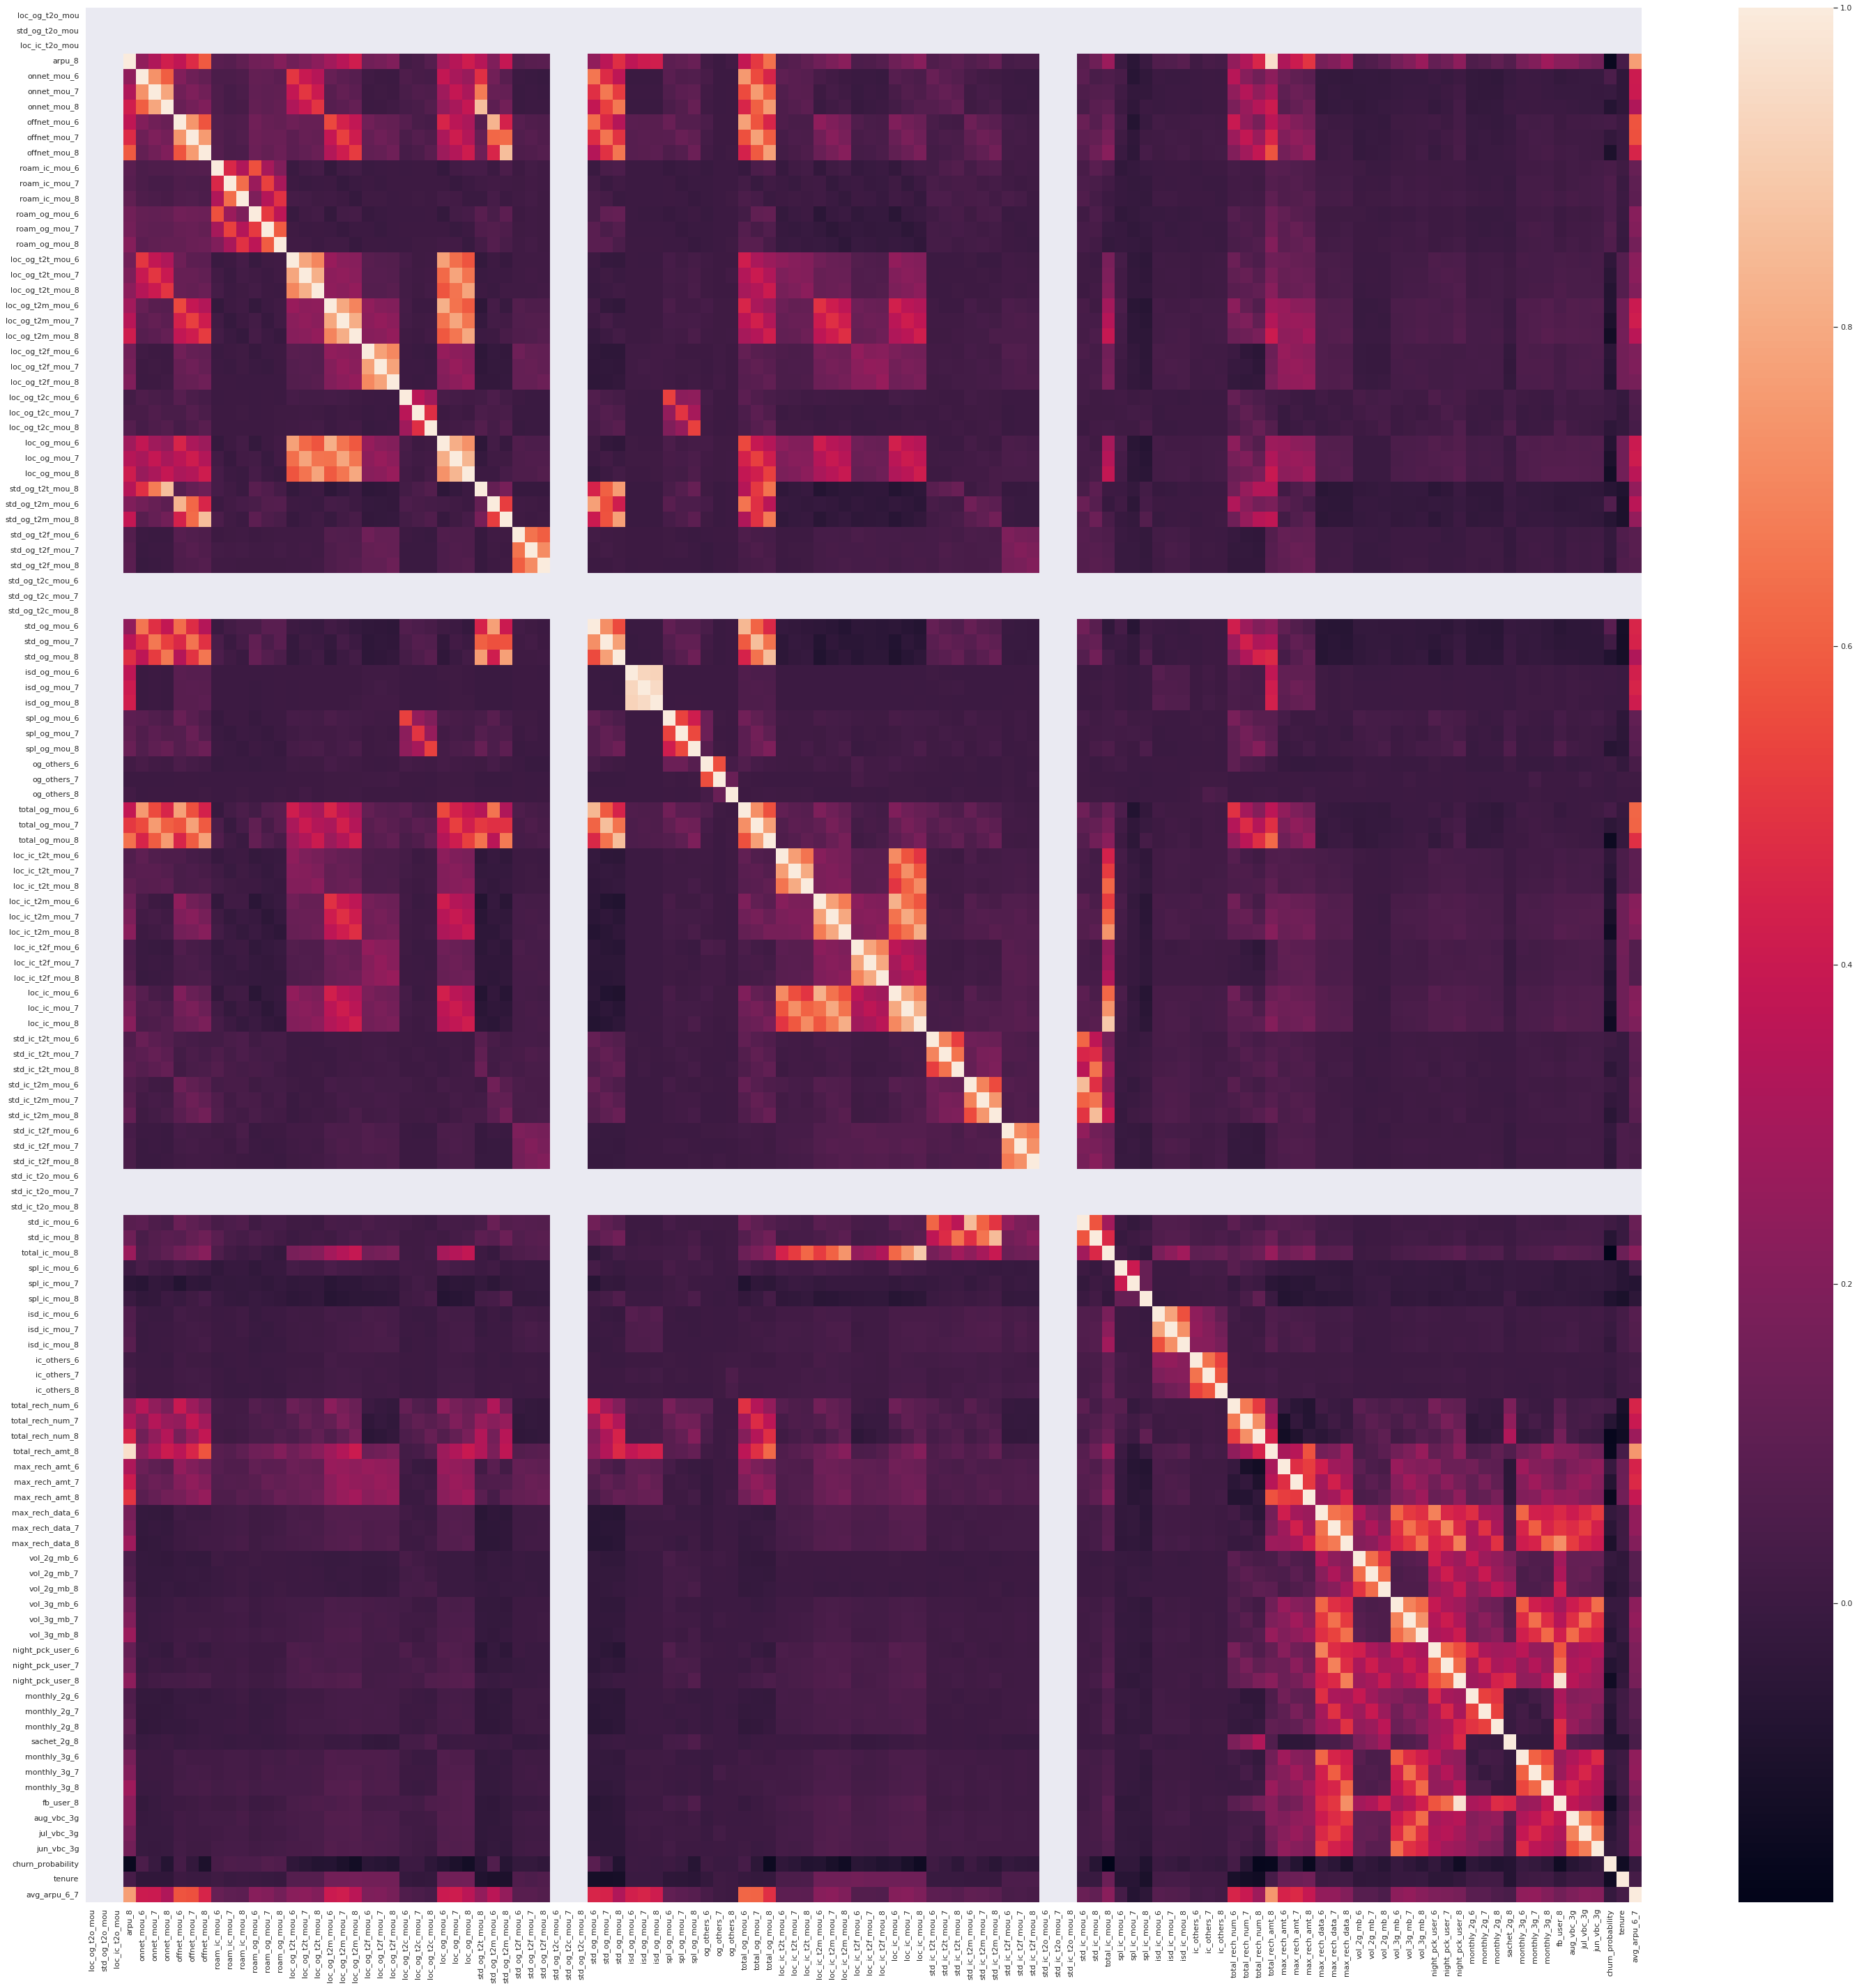

In [59]:
plt.figure(figsize = (50, 50))
sns.heatmap(churn_filtered.corr())
plt.show()

In [60]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 127 entries, loc_og_t2o_mou to total_rech_num_group_8
dtypes: category(3), float64(109), int64(15)
memory usage: 66.4 MB


In [61]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [62]:
churn_filtered.shape

(69999, 125)

In [63]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 125 entries, loc_og_t2o_mou to avg_arpu_6_7
dtypes: category(1), float64(109), int64(15)
memory usage: 66.3 MB


In [64]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [65]:
churn_rate = (sum(churn_filtered["churn_probability"])/len(churn_filtered["churn_probability"].index))*100
churn_rate

10.188716981671167

In [66]:
churn_filtered.sample()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure,avg_arpu_6_7
52095,0.0,0.0,0.0,448.801,1.01,78.49,396.96,148.84,275.71,439.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.59,12.14,1.33,42.51,21.44,0.0,0.0,0.0,0.0,0.0,6.96,1.33,55.11,33.59,384.81,147.51,405.01,0.0,0.0,0.0,0.0,0.0,0.0,148.53,299.09,789.83,0.0,0.0,0.0,0.0,0.78,13.11,0.0,0.0,0.0,149.86,354.99,836.54,0.0,117.06,92.26,8.56,57.53,38.11,0.0,0.0,0.0,8.56,174.59,130.38,0.0,25.46,72.29,17.96,18.93,111.79,0.0,0.0,0.0,0.0,0.0,0.0,17.96,184.09,314.76,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.5,0.28,13,12,14,512,30,50,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.0,0.0,0.0,0,9.0,195.749


# 7. Model Building

Model building is the process of developing a probabilistic model that best describes the relationship between independent and dependent variables. Various ML models are to be built based on the problem statement.

Below are the topics that can be covered in this step :

1. Split the data into train and test
2. Perfrom Scaling 
3. Over Sampling and Under Sampling (if the data is imbalanced)

In [67]:
churn_filtered.shape

(69999, 124)

In [68]:
# Using sklearn package for data split
from sklearn.model_selection import train_test_split

# divide data into train and test
X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [69]:
# print shapes of train and test sets
X_train.shape

(52499, 123)

In [70]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52499,)
(17500, 123)
(17500,)


## 7.1 Scaling

In [71]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
6864,0.0,0.0,0.0,267.141,199.01,188.34,263.91,97.03,125.830,71.28,0.0,0.0,0.00,0.0,0.0,0.00,199.01,188.34,263.91,96.48,61.88,42.49,0.55,9.04,0.41,0.0,0.00,0.00,296.04,259.28,306.83,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.0,0.65,58.78,31.26,0.41,0.0,0.0,297.11,318.06,338.09,87.46,93.44,104.13,87.11,56.18,57.24,0.00,0.33,0.00,174.58,149.96,161.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,161.38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,6,10,13,300,33,44,30,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.0,20.0,221.1300
62262,0.0,0.0,0.0,242.904,300.43,312.21,143.84,345.36,180.210,24.93,0.0,0.0,9.33,0.0,0.0,113.74,0.00,0.00,0.00,3.09,2.73,0.00,0.00,0.00,0.00,0.0,4.14,14.14,3.09,2.73,0.00,59.63,337.63,0.00,0.0,0.0,0.0,0.0,0.0,0.0,638.06,488.74,59.630,0.0,0.0,0.0,13.89,6.68,6.15,0.00,0.0,0.0,655.06,498.16,65.78,5.54,0.00,0.00,16.86,35.14,3.14,0.00,0.41,0.00,22.41,35.56,3.14,1.13,13.61,18.63,11.48,1.76,1.06,0.0,0.0,0.0,0.0,0.0,0.0,12.61,19.69,23.51,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.66,4,6,8,180,110,110,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.0,29.0,272.4870
24732,0.0,0.0,0.0,75.852,5.79,6.89,7.36,28.49,18.960,60.38,0.0,0.0,0.00,0.0,0.0,0.00,5.79,6.89,7.36,14.03,16.91,56.31,0.00,0.50,0.75,0.0,0.00,0.00,19.83,24.31,64.43,0.00,14.46,3.31,0.0,0.0,0.0,0.0,0.0,0.0,14.46,1.55,3.310,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,34.29,25.86,67.74,8.41,1.71,4.61,39.99,18.88,20.46,0.00,4.18,0.66,48.41,24.78,25.74,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,25.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,4,5,11,90,10,10,10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.0,51.0,33.1730
33565,0.0,0.0,0.0,307.001,34.11,23.14,24.68,96.48,25.860,17.56,0.0,0.0,0.00,0.0,0.0,0.00,11.91,0.74,4.36,41.03,5.03,0.96,0.00,0.00,0.00,0.0,0.00,17.66,65.19,5.78,5.33,20.31,3.98,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.73,22.39,20.310,0.0,0.0,0.0,0.00,23.93,23.68,0.00,0.0,0.0,0.00,52.11,49.33,15.74,1.48,8.31,56.46,2.24,17.48,0.88,0.00,0.00,92.43,3.73,25.79,0.00,3.63,5.71,2.04,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5.91,5.71,31.73,0.0,0.0,0.21,0.0

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52499 entries, 6864 to 23464
Columns: 123 entries, loc_og_t2o_mou to avg_arpu_6_7
dtypes: float64(109), int64(14)
memory usage: 49.7 MB


In [73]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [74]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [75]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
6864,0.0,0.0,0.0,0.022291,0.026978,0.023087,0.024544,0.017039,0.018669,0.005089,0.0,0.0,0.000000,0.0,0.0,0.000000,0.030944,0.029558,0.024544,0.020542,0.013579,0.008564,0.000891,0.011088,0.000697,0.0,0.000000,0.000000,0.027814,0.040388,0.027793,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000635,0.030142,0.032750,0.000672,0.0,0.0,0.027835,0.038387,0.024075,0.017608,0.011273,0.009735,0.022483,0.012608,0.009123,0.00000,0.000166,0.000000,0.023419,0.017956,0.014901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.014901,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035294,0.072464,0.102362,0.006620,0.008229,0.013337,0.006743,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.101449,0.021099
62262,0.0,0.0,0.0,0.021579,0.040727,0.038271,0.013377,0.060648,0.026737,0.001780,0.0,0.0,0.002238,0.0,0.0,0.021311,0.000000,0.000000,0.000000,0.000658,0.000599,0.000000,0.000000,0.000000,0.000000,0.0,0.004518,0.040190,0.000290,0.000425,0.000000,0.007440,0.060049,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.085097,0.059927,0.004265,0.0,0.0,0.0,0.013575,0.003425,0.006443,0.000000,0.0,0.0,0.061370,0.060123,0.004684,0.001115,0.000000,0.000000,0.004352,0.007886,0.000500,0.00000,0.000207,0.000000,0.003006,0.004258,0.000290,0.000339,0.002890,0.004740,0.002033,0.000287,0.000192,0.0,0.0,0.0,0.0,0.0,0.0,0.002208,0.003480,0.002171,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000546,0.023529,0.043478,0.062992,0.003972,0.027431,0.033343,0.011238,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.166667,0.022709
24732,0.0,0.0,0.0,0.016671,0.000785,0.000845,0.000684,0.005003,0.002813,0.004311,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000900,0.001081,0.000684,0.002987,0.003711,0.011350,0.000000,0.000613,0.001275,0.0,0.000000,0.000000,0.001863,0.003787,0.005836,0.000000,0.002572,0.000237,0.0,0.0,0.0,0.0,0.0,0.0,0.001929,0.000190,0.000237,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.003212,0.003121,0.004824,0.001693,0.000206,0.000431,0.010321,0.004237,0.0032

As there are many variables we will start the process of dropping variables after doing the RFE

## 7.2. Data Imbalance Handling
- Over Sampling and Under Sampling (if the data is imbalanced)
- Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [78]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (94300, 123)
Dimension of y_train_sm Shape: (94300,)


## Build Model - Logistic Regression

In [79]:
# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                94300
Model:                            GLM   Df Residuals:                    94185
Model Family:                Binomial   Df Model:                          114
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31981.
Date:                Mon, 12 Dec 2022   Deviance:                       63963.
Time:                        21:29:40   Pearson chi2:                 9.82e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5074
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5667      0.108     -5.268      0.000      -0.778      -0.356
loc_og_t2o_mou    8.783e-06   6.83e-07     12.864      0.000    7.44e-06    1.01e-05
std_og_t2o_mou   -5.935e-06   4.02e-07    -14.770      0.000   -6.72e-06   -5.15e-06
loc_ic_t2o_mou    7.841e-07   1.47e-07      5.352      0.000    4.97e-07    1.07e-06
arpu_8              66.4308      6.083     10.920      0.000      54.507      78.354
onnet_mou_6        -81.1114     26.760     -3.031      0.002    -133.560     -28.663
onnet_mou_7        -69.1051     18.118     -3.814      0.000    -104.615     -33.595
onnet_mou_8         14.3147     32.754      0.437      0.662     -49.881      78.511
offnet_mou_6       -54.6215     20.515     -2.663      0.008     -94.830     -14.413
offnet_mou_7       -58.3182     14.941     -3.903      0.000     -87.603     -29.034
offnet_mou_8        -6.9051     41.576     -0.166      0.868     -88.393      74.583
roam_ic_mou_6        2.6541      0.694      3.825      0.000       1.294       4.014
roam_ic_mou_7        5.6578      1.386      4.081      0.000       2.940       8.375
roam_ic_mou_8       -3.0185      1.261     -2.395      0.017      -5.489      -0.548
roam_og_mou_6       37.3670     13.639      2.740      0.006      10.635      64.099
roam_og_mou_7       26.4193      6.277      4.209      0.000      14.117      38.722
roam_og_mou_8       17.4472     15.950      1.094      0.274     -13.814      48.708
loc_og_t2t_mou_6  5.221e+04   1.33e+04      3.933      0.000    2.62e+04    7.82e+04
loc_og_t2t_mou_7  7.967e+04   1.32e+04      6.048      0.000    5.38e+04    1.05e+05
loc_og_t2t_mou_8  4.512e+05   2.33e+04     19.360      0.000    4.06e+05    4.97e+05
loc_og_t2m_mou_6  3.812e+04   9695.672      3.932      0.000    1.91e+04    5.71e+04
loc_og_t2m_mou_7  5.698e+04   9421.332      6.048      0.000    3.85e+04    7.54e+04
loc_og_t2m_mou_8  2.082e+05   1.08e+04     19.361      0.000    1.87e+05    2.29e+05
loc_og_t2f_mou_6  5009.6765   1274.997      3.929      0.000    2510.729    7508.624
loc_og_t2f_mou_7   1.02e+04   1685.694      6.049      0.000    6892.783    1.35e+04
loc_og_t2f_mou_8  2.469e+04   1275.189     19.364      0.000    2.22e+04    2.72e+04
loc_og_t2c_mou_6    -2.9070      1.088     -2.673      0.008      -5.039      -0.775
loc_og_t2c_mou_7    -0.1770      1.846     -0.096      0.924      -3.795       3.441
loc_og_t2c_mou_8     5.7773      1.064      5.431      0.000       3.692       7.862
loc_og_mou_6     -5.017e+04   2.01e+04     -2.495      0.013   -8.96e+04   -1.08e+04
loc_og_mou_7     -3.976e+04   1.21e+04     -3.277      0.001   -6.35e+04    -1.6e+04
loc_og_mou_8     -5.569e+05   2.85e+04    -19.544      0.000   -6.13e+05   -5.01e+05
std_og_t2t_mou_8 -2.082e+04   2.28e+04     -0.914      0.361   -6.54e+04    2.38e+04
std_og_t2m_mou_6    -7.

## Build Model - Logistic Regression using Feature Selection (RFE method)

In [81]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [82]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [83]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'std_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8'],
      dtype='object')


In [84]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 104),
 ('std_og_t2o_mou', False, 103),
 ('loc_ic_t2o_mou', False, 102),
 ('arpu_8', False, 15),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 5),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 47),
 ('roam_ic_mou_7', False, 14),
 ('roam_ic_mou_8', False, 41),
 ('roam_og_mou_6', False, 77),
 ('roam_og_mou_7', False, 36),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 81),
 ('loc_og_t2t_mou_7', False, 67),
 ('loc_og_t2t_mou_8', False, 20),
 ('loc_og_t2m_mou_6', False, 21),
 ('loc_og_t2m_mou_7', False, 45),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 48),
 ('loc_og_t2f_mou_7', False, 59),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 37),
 ('loc_og_t2c_mou_7', False, 57),
 ('loc_og_t2c_mou_8', False, 88),
 ('loc_og_mou_6', False, 92),
 ('loc_og_mou_7', False, 74),
 ('loc_og_mou_8', False, 58),
 ('std_og_t2t_mou_8', False, 85),

### Assessing the model with StatsModels

In [115]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                94300
Model:                            GLM   Df Residuals:                    94279
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40109.
Date:                Mon, 12 Dec 2022   Deviance:                       80218.
Time:                        22:10:19   Pearson chi2:                 2.76e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4147
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1340      0.018     64.196      0.000       1.099       1.169
onnet_mou_6         22.1461      1.375     16.101      0.000      19.450      24.842
onnet_mou_7         72.6376      1.908     38.071      0.000      68.898      76.377
offnet_mou_6        17.6944      1.045     16.931      0.000      15.646      19.743
offnet_mou_7        45.7824      1.563     29.288      0.000      42.719      48.846
offnet_mou_8        44.7512      1.768     25.316      0.000      41.287      48.216
roam_og_mou_8       -5.3990      1.215     -4.444      0.000      -7.780      -3.018
loc_og_t2m_mou_8    -5.2421      1.028     -5.102      0.000      -7.256      -3.228
loc_og_t2f_mou_8    -4.6753      1.109     -4.215      0.000      -6.850      -2.501
std_og_mou_7         7.8771      0.783     10.060      0.000       6.342       9.412
spl_og_mou_8       -13.1870      1.268    -10.398      0.000     -15.673     -10.701
total_og_mou_6     -28.1645      1.887    -14.923      0.000     -31.864     -24.465
total_og_mou_7     -57.8101      1.876    -30.811      0.000     -61.487     -54.133
total_og_mou_8     -50.2372      1.427    -35.198      0.000     -53.035     -47.440
loc_ic_t2f_mou_8   -21.7912      1.901    -11.461      0.000     -25.518     -18.065
total_ic_mou_8     -80.1550      1.495    -53.628      0.000     -83.084     -77.226
spl_ic_mou_7       -11.9078      1.243     -9.583      0.000     -14.343      -9.472
spl_ic_mou_8       -37.1863      1.149    -32.354      0.000     -39.439     -34.934
isd_ic_mou_8        34.4649      0.992     34.730      0.000      32.520      36.410
total_rech_num_8    -8.6841      0.305    -28.440      0.000      -9.283      -8.086
max_rech_amt_8     -22.8384      0.539    -42.376      0.000     -23.895     -21.782
====================================================================================
"""

In [116]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.10550142, 0.74030496, 0.51078235, 0.14341681, 0.9190566 ,
       0.33297   , 0.26307499, 0.80195687, 0.78060732, 0.02091515])

In [117]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.105501
1,0,0.740305
2,0,0.510782
3,0,0.143417
4,1,0.919057


## Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [118]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.105501,0
1,0,0.740305,1
2,0,0.510782,1
3,0,0.143417,0
4,1,0.919057,1


In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[38237  8913]
 [ 6513 40637]]


In [120]:
# accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8364156945917285


In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_og_mou_7,99.09
10,total_og_mou_6,65.05
3,offnet_mou_7,42.81
1,onnet_mou_7,36.14
2,offnet_mou_6,29.73
0,onnet_mou_6,25.16
8,std_og_mou_7,10.58
12,total_og_mou_8,6.96
4,offnet_mou_8,6.81
6,loc_og_t2m_mou_8,3.17


In [122]:
# Defining a function to evaluateMetricsTradeOff
def evaluate_metric_trade_off(confusionMatrix):
    TP = confusionMatrix[1,1] # true positive 
    TN = confusionMatrix[0,0] # true negatives
    FP = confusionMatrix[0,1] # false positives
    FN = confusionMatrix[1,0] # false negatives
    
    # Let's see the sensitivity of our logistic regression model
    print("Sensitivity = ",TP / float(TP+FN))

    # Let us calculate specificity
    print("Specificity = ",TN / float(TN+FP))

    # Calculate false postive rate - predicting churn when customer does not have churned
    print("False Positive Rate = ",FP/ float(TN+FP))

    # positive predictive value 
    print ("Precision = ",TP / float(TP+FP))

    # Negative predictive value
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

In [123]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
evaluate_metric_trade_off(confusion)

Sensitivity =  0.8618663838812302
Specificity =  0.8109650053022269
False Positive Rate =  0.18903499469777307
Precision =  0.8201210898082745
True Negative Prediction Rate =  0.8544581005586592


In [125]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

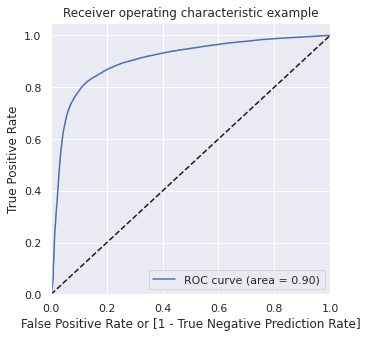

In [126]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

Let's try to find out Optimal Cutoff Point

In [127]:
from sklearn.metrics import confusion_matrix
    
def get_cutoff(arg_y_train_sm_pred_final, num):
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

#     num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
    for i in num:
        cm1 = metrics.confusion_matrix(arg_y_train_sm_pred_final.Converted, arg_y_train_sm_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    print(cutoff_df)
    return cutoff_df

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105501,0,1,1,0,0,0,0,0,0,0,0
1,0,0.740305,1,1,1,1,1,1,1,1,1,0,0
2,0,0.510782,1,1,1,1,1,1,1,0,0,0,0
3,0,0.143417,0,1,1,0,0,0,0,0,0,0,0
4,1,0.919057,1,1,1,1,1,1,1,1,1,1,1


In [129]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
get_cutoff(y_train_sm_pred_final, num)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.668293  0.970308     0.366278   
0.2  0.2          0.726723  0.949141     0.504305   
0.3  0.3          0.773468  0.927317     0.619618   
0.4  0.4          0.811060  0.900594     0.721527   
0.5  0.5          0.836416  0.861866     0.810965   
0.6  0.6          0.845917  0.809077     0.882757   
0.7  0.7          0.829088  0.725366     0.932810   
0.8  0.8          0.738399  0.508208     0.968590   
0.9  0.9          0.617964  0.250032     0.985896   


,probability,accuracy,sensitivity,specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.668293,0.970308,0.366278
0.2,0.2,0.726723,0.949141,0.504305
0.3,0.3,0.773468,0.927317,0.619618
0.4,0.4,0.811060,0.900594,0.721527
0.5,0.5,0.836416,0.861866,0.810965
0.6,0.6,0.845917,0.809077,0.882757
0.7,0.7,0.829088,0.725366,0.932810
0.8,0.8,0.738399,0.508208,0.968590
0.9,0.9,0.617964,0.250032,0.985896


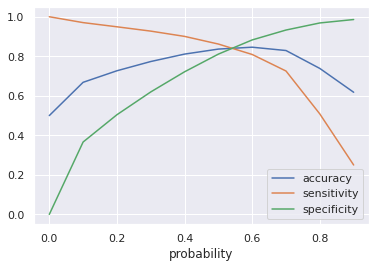

In [130]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- Initially we selected the optimum point of classification as 0.5.

- From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.


Let's create columns with refined probability cutoffs 

In [131]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.105501,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.740305,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
2,0,0.510782,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0.143417,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.919057,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
get_cutoff(y_train_sm_pred_final, numbers)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.836416  0.861866     0.810965   
0.51  0.51         0.837137  0.856352     0.817922   
0.52  0.52         0.839003  0.851410     0.826596   
0.53  0.53         0.840286  0.846151     0.834422   
0.54  0.54         0.841813  0.840976     0.842651   
0.55  0.55         0.843203  0.836585     0.849820   
0.56  0.56         0.844507  0.831877     0.857137   
0.57  0.57         0.845207  0.826808     0.863606   
0.58  0.58         0.845822  0.821315     0.870329   
0.59  0.59         0.845716  0.814995     0.876437   


,probability,accuracy,sensitivity,specificity
0.50,0.50,0.836416,0.861866,0.810965
0.51,0.51,0.837137,0.856352,0.817922
0.52,0.52,0.839003,0.851410,0.826596
0.53,0.53,0.840286,0.846151,0.834422
0.54,0.54,0.841813,0.840976,0.842651
0.55,0.55,0.843203,0.836585,0.849820
0.56,0.56,0.844507,0.831877,0.857137
0.57,0.57,0.845207,0.826808,0.863606
0.58,0.58,0.845822,0.821315,0.870329
0.59,0.59,0.845716,0.814995,0.876437


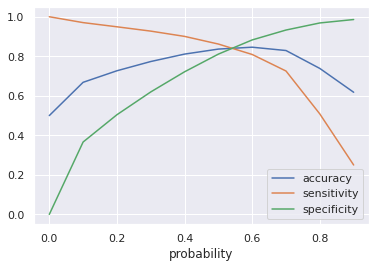

In [133]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [134]:
## From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.105501,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.740305,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.510782,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.143417,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.919057,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8402863202545069


In [136]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[39343  7807]
 [ 7254 39896]]


In [137]:
evaluate_metric_trade_off(confusion2)

Sensitivity =  0.8461505832449628
Specificity =  0.8344220572640509
False Positive Rate =  0.16557794273594909
Precision =  0.8363415298828166
True Negative Prediction Rate =  0.8443247419361761


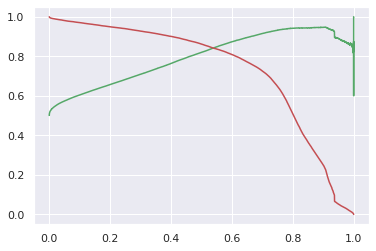

In [138]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

Transforming and feature selection for test data

In [139]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
57783,0.0,0.0,0.0,0.022569,0.001841,0.001176,0.002093,0.034627,0.018261,0.006271,0.000000,0.0,0.0,0.000000,0.0,0.0,0.002031,0.001505,0.001165,0.006958,0.001797,0.003942,0.0,0.000000,0.0,0.000000,0.0,0.0,0.004298,0.002771,0.002907,0.001245,0.028930,0.004895,0.002514,0.0,0.0,0.0,0.0,0.0,0.021974,0.013875,0.005598,0.0,0.0,0.0,0.000244,0.002405,0.005385,0.002886,0.0,0.0,0.019911,0.016373,0.008225,0.009287,0.005110,0.002478,0.008770,0.012880,0.009992,0.000000,0.000000,0.000000,0.010746,0.011945,0.008237,0.000000,0.000000,0.000000,0.044104,0.000230,0.000923,0.003264,0.000000,0.0,0.0,0.0,0.0,0.044376,0.000899,0.008708,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.035294,0.050725,0.078740,0.006090,0.016708,0.020309,0.011238,0.000000,0.016077,0.016077,0.000000,0.007035,0.005130,0.0,0.0,0.0,0.0,0.5,0.5,0.00,0.0,0.00,0.058824,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.123188,0.020976
69771,0.0,0.0,0.0,0.014442,0.004624,0.003957,0.002985,0.016943,0.013633,0.006554,0.000000,0.0,0.0,0.000000,0.0,0.0,0.001852,0.001817,0.001092,0.008736,0.008815,0.008133,0.0,0.000000,0.0,0.000000,0.0,0.0,0.006125,0.009880,0.005754,0.000000,0.000708,0.000237,0.000000,0.0,0.0,0.0,0.0,0.0,0.001564,0.001381,0.000751,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.003169,0.001910,0.001500,0.014572,0.012777,0.009278,0.000470,0.000459,0.000555,0.012399,0.011077,0.008669,0.000000,0.000000,0.000000,0.000361,0.000335,0.000368,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001035,0.001030,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.005882,0.000000,0.000000,0.000000,0.026434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.057971,0.015579
33124,0.0,0.0,0.0,0.021167,0.004834,0.004837,0.001412,0.083741,0.058391,0.020929,0.000000,0.0,0.0,0.000000,0.0,0.0,0.005545,0.006193,0.001412,0.100681,0.086361,0.059089,0.0,0.000000,0.0,0.000000,0.0,0.0,0.047780,0.067452,0.027930,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.003890,0.000000,0.000534,0.000787,0.0,0.0,0.048062,0.052263,0.021994,0.006304,0.003111,0.006319

In [140]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,std_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2f_mou_8,total_ic_mou_8,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_8,total_rech_num_8,max_rech_amt_8
57783,0.001841,0.001176,0.034627,0.018261,0.006271,0.0,0.003942,0.0,0.013875,0.005385,0.019911,0.016373,0.008225,0.000000,0.008708,0.000000,0.0,0.0,0.078740,0.011238
69771,0.004624,0.003957,0.016943,0.013633,0.006554,0.0,0.008133,0.0,0.001381,0.000000,0.000000,0.000000,0.000000,0.000555,0.000000,0.000000,0.0,0.0,0.000000,0.000000
33124,0.004834,0.004837,0.083741,0.058391,0.020929,0.0,0.059089,0.0,0.000000,0.000534,0.048062,0.052263,0.021994,0.000000,0.033493,0.020802,0.0,0.0,0.125984,0.006743
16165,0.000056,0.000000,0.020202,0.008651,0.013610,0.0,0.038425,0.0,0.000000,0.000000,0.010817,0.007037,0.015635,0.004939,0.043362,0.000000,0.0,0.0,0.086614,0.011238
19316,0.002818,0.000292,0.073058,0.007795,0.009567,0.0,0.024959,0.0,0.000715,0.000691,0.016452,0.006702,0.010025,0.018675,0.060675,0.000000,0.0,0.0,0.047244,0.044504


In [141]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [142]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 57783    3.654321e-01
69771    9.368587e-01
33124    3.581088e-02
16165    2.203745e-02
19316    7.461957e-03
32489    7.718031e-01
29008    1.440617e-01
35944    6.044865e-10
38363    5.942347e-01
2149     3.716730e-01
dtype: float64


In [143]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
57783,0.365432
69771,0.936859
33124,0.035811
16165,0.022037
19316,0.007462


In [144]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [145]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
57783,0
69771,1
33124,0
16165,0
19316,0


In [146]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
57783,0,0.365432
69771,1,0.936859
33124,0,0.035811
16165,0,0.022037
19316,0,0.007462


In [147]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
57783,0,0.365432,0
69771,1,0.936859,1
33124,0,0.035811,0
16165,0,0.022037,0
19316,0,0.007462,0


In [148]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8416

## Metrics Evaluation

In [149]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[13279  2438]
 [  334  1449]]


In [150]:
evaluate_metric_trade_off(confusion2_test)

Sensitivity =  0.8126752664049355
Specificity =  0.8448813386778647
False Positive Rate =  0.15511866132213525
Precision =  0.3727810650887574
True Negative Prediction Rate =  0.9754646293983692


## Conclusion for Logistic Regression Model

In [152]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
evaluate_metric_trade_off(confusion2_test)

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  84.0 %
Sensitivity =  0.8126752664049355
Specificity =  0.8448813386778647
False Positive Rate =  0.15511866132213525
Precision =  0.3727810650887574
True Negative Prediction Rate =  0.9754646293983692

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



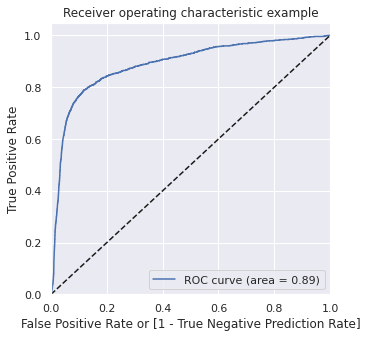

In [153]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

### The AUC score for train dataset is 0.90 and the test dataset is 0.89. Hence we could say that, this model can be considered as a good model.**

# PCA

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [156]:
X_train.shape

(55999, 123)

In [157]:
pca = PCA(random_state=42)

In [158]:
pca.fit(X_train)

PCA(random_state=42)

In [159]:
pca.components_

array([[-1.29038552e-19,  2.22044605e-16,  1.11022302e-16, ...,
         1.67861811e-02, -6.64044969e-04,  2.00527747e-01],
       [-9.79344163e-20,  2.77555756e-16, -1.11022302e-16, ...,
         1.74998933e-01,  7.23050840e-04,  7.93725254e-02],
       [-2.32156095e-19,  1.66533454e-16, -2.22044605e-16, ...,
        -1.28506700e-02,  1.15425114e-02,  9.38113168e-02],
       ...,
       [ 0.00000000e+00,  5.33453900e-04, -5.53878058e-04, ...,
         1.26716129e-17, -1.22514845e-17,  1.78215732e-17],
       [ 0.00000000e+00, -9.85035447e-01,  1.70177279e-01, ...,
        -1.94289029e-16, -8.47238946e-15,  1.22124533e-15],
       [ 1.00000000e+00,  5.59942530e-26,  3.02122387e-26, ...,
        -1.92072887e-19,  3.40745350e-18,  5.54864929e-20]])

Let's analysing the explained variance ratio

In [160]:
pca.explained_variance_ratio_

array([3.09066199e-01, 1.94212750e-01, 9.11098604e-02, 6.09422644e-02,
       5.47555498e-02, 3.89801700e-02, 3.27377509e-02, 2.85778711e-02,
       2.32692031e-02, 2.09313563e-02, 1.83936458e-02, 1.64637393e-02,
       1.26949561e-02, 1.02043734e-02, 9.63591956e-03, 7.33672835e-03,
       6.80189086e-03, 5.50366996e-03, 4.80385138e-03, 4.50363302e-03,
       4.19653665e-03, 4.01848720e-03, 3.61765263e-03, 3.55557665e-03,
       3.20615046e-03, 2.80461082e-03, 2.65368101e-03, 2.60190086e-03,
       2.15930948e-03, 1.88622502e-03, 1.74010185e-03, 1.58679719e-03,
       1.49699037e-03, 1.45635934e-03, 1.27677649e-03, 1.05864432e-03,
       1.03438033e-03, 9.56613284e-04, 8.23121942e-04, 6.97571841e-04,
       6.54116295e-04, 6.29018792e-04, 5.04194098e-04, 4.61805964e-04,
       4.27284298e-04, 3.83945543e-04, 3.21370805e-04, 3.09494153e-04,
       2.90812786e-04, 2.83680537e-04, 2.14319532e-04, 2.02987819e-04,
       1.88604482e-04, 1.50885858e-04, 1.43136353e-04, 1.40711688e-04,
      

In [161]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

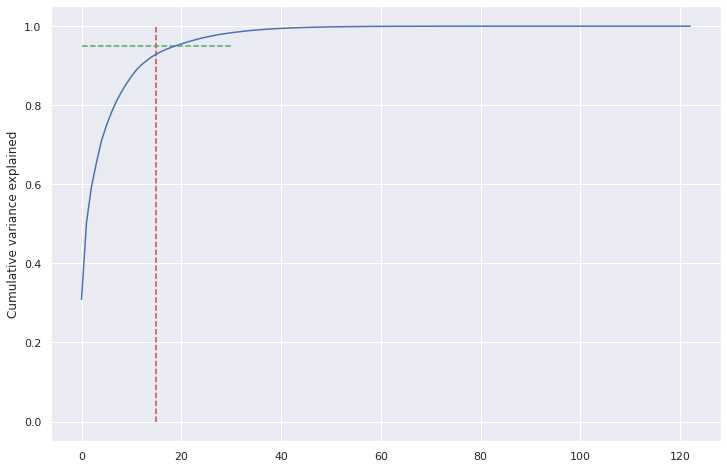

In [162]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Let's try IncrementalPCA for the best result

In [163]:
pca_final = IncrementalPCA(n_components=16)

In [164]:
df_train_pca = pca_final.fit_transform(X_train)

In [165]:
df_train_pca.shape

(55999, 16)

In [166]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [167]:
corrmat.shape

(16, 16)

In [168]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 16)

Now applying logistic regression on the Principal components and see reslut 

In [169]:
learner_pca = LogisticRegression()

In [170]:
model_pca = learner_pca.fit(df_train_pca, y_train)

### Making predictions on the test set

In [171]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [172]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

In [173]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[12506    83]
 [ 1325    86]]


In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

evaluate_metric_trade_off(confusion)

Accuracy:- 0.8994285714285715
Sensitivity =  0.06094968107725018
Specificity =  0.9934069425689094
False Positive Rate =  0.006593057431090635
Precision =  0.5088757396449705
True Negative Prediction Rate =  0.90420070855325


### Making predictions on the train set

In [177]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [178]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.85'

In [179]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [180]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[49954   324]
 [ 5332   389]]


In [181]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))


evaluate_metric_trade_off(confusion)

Accuracy:- 0.8989981963963642
Sensitivity =  0.06799510575074287
Specificity =  0.9935558295874936
False Positive Rate =  0.006444170412506464
Precision =  0.5455820476858345
True Negative Prediction Rate =  0.9035560539738813


# Decision Tree with PCA

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dt = DecisionTreeClassifier(random_state=42)

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [186]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [187]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [188]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.256349,0.003534,0.002827,0.000130,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.897857,0.897857,0.897786,0.89785,0.897837,0.00003,46
1,0.361232,0.097001,0.003914,0.001778,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.897857,0.897857,0.897786,0.89785,0.897837,0.00003,46
2,0.491584,0.107476,0.006267,0.003451,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.897857,0.897857,0.897786,0.89785,0.897837,0.00003,46
3,0.331206,0.042123,0.006502,0.003714,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.897857,0.897857,0.897786,0.89785,0.897837,0.00003,46
4,0.262626,0.002796,0.003098,0.000600,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.897857,0.897857,0.897786,0.89785,0.897837,0.00003,46


In [189]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
55,0.991251,0.007205,0.003646,0.000116,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.907857,0.907286,0.907643,0.906565,0.907338,0.000491,1
52,1.176917,0.170481,0.003784,0.000083,10,20,150,"{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 150}",0.908000,0.907500,0.906643,0.905993,0.907034,0.000772,2
54,0.993175,0.005295,0.003696,0.000076,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.907214,0.907357,0.905929,0.907136,0.906909,0.000572,3
56,1.288593,0.236528,0.006763,0.003043,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.907214,0.907357,0.905929,0.907136,0.906909,0.000572,3
70,1.282309,0.151338,0.003864,0.000064,20,50,150,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.906286,0.906643,0.908000,0.906350,0.906820,0.000695,5


In [190]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=42)

In [191]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [192]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [198]:
evaluate_model(dt_best)

Train Accuracy : 0.9206592974874551
Train Confusion Matrix:
[[49345   933]
 [ 3510  2211]]
--------------------------------------------------
Test Accuracy : 0.9097142857142857
Test Confusion Matrix:
[[12280   309]
 [  955   456]]


# Random Forest with PCA

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

11


In [201]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [202]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.0s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [203]:
rf.oob_score_

0.8978374613832389

In [204]:
from sklearn.metrics import plot_roc_curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


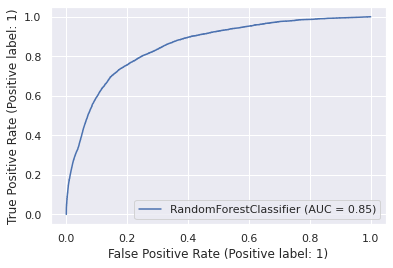

In [205]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

## Hyper-parameter tuning for the Random Forest

In [206]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [207]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [208]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [209]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [210]:
grid_search.best_score_

0.8991946133907525

In [211]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 200}

In [212]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [213]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [214]:
evaluate_model(rfc_model)

Train Accuracy : 0.8998196396364221
Train Confusion Matrix:
[[50277     1]
 [ 5609   112]]
--------------------------------------------------
Test Accuracy : 0.9012857142857142
Test Confusion Matrix:
[[12588     1]
 [ 1381    30]]


In [215]:
rfc_model.feature_importances_

array([0.13122057, 0.12718816, 0.16611164, 0.27370963, 0.03021581,
       0.06149042, 0.0337555 , 0.02217673, 0.00559226, 0.02124272,
       0.01368234, 0.01413425, 0.01740437, 0.04006364, 0.00928828,
       0.03272368])

## the best parameters procuded the accuracy of 90% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

# 10. Conclusion 

The best model to predict the churn is observed to be __Random Forest__ based on the accuracy as performance measure.

- The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

**Logistic Regression :**
- Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

**Logistic Regression**
- Train Accuracy : ~90% . Test Accuracy : ~88%

**Logistic regression with PCA**
- Train Accuracy : ~92% . Test Accuracy : ~92%

**Decision Tree with PCA:**
- Train Accuracy : ~94% . Test Accuracy : ~93%

**Random Forest with PCA:**
- Train Accuracy :~ 92% . Test Accuracy :~ 92%

# 9. Model Predict

In [216]:
churn_test = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c42/test.csv")

In [217]:
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [218]:
churn_test.shape

(30000, 171)

In [220]:
metadataInfo(churn_test)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,7585,22415,74.72,2676
count_rech_3g_6,float64,7585,22415,74.72,23
fb_user_6,float64,7585,22415,74.72,2
night_pck_user_6,float64,7585,22415,74.72,2
total_rech_data_6,float64,7585,22415,74.72,28
max_rech_data_6,float64,7585,22415,74.72,43
count_rech_2g_6,float64,7585,22415,74.72,26
date_of_last_rech_data_6,object,7585,22415,74.72,30
av_rech_amt_data_6,float64,7585,22415,74.72,562
arpu_2g_6,float64,7585,22415,74.72,2776


In [221]:
churn_id = churn_test['id']

In [222]:
churn_test['tenure'] = (churn_test['aon']/30).round(0)
churn_test["avg_arpu_6_7"]= (churn_test['arpu_6']+churn_test['arpu_7'])/2

churn_test = churn_test[X.columns]

In [223]:
churn_test.shape

(30000, 123)

In [224]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

7.273143631436314

In [225]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

loc_og_t2o_mou : 1.05
std_og_t2o_mou : 1.05
loc_ic_t2o_mou : 1.05
arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
roam_ic_mou_6 : 3.90
roam_ic_mou_7 : 3.91
roam_ic_mou_8 : 5.58
roam_og_mou_6 : 3.90
roam_og_mou_7 : 3.91
roam_og_mou_8 : 5.58
loc_og_t2t_mou_6 : 3.90
loc_og_t2t_mou_7 : 3.91
loc_og_t2t_mou_8 : 5.58
loc_og_t2m_mou_6 : 3.90
loc_og_t2m_mou_7 : 3.91
loc_og_t2m_mou_8 : 5.58
loc_og_t2f_mou_6 : 3.90
loc_og_t2f_mou_7 : 3.91
loc_og_t2f_mou_8 : 5.58
loc_og_t2c_mou_6 : 3.90
loc_og_t2c_mou_7 : 3.91
loc_og_t2c_mou_8 : 5.58
loc_og_mou_6 : 3.90
loc_og_mou_7 : 3.91
loc_og_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_6 : 3.90
std_og_t2m_mou_8 : 5.58
std_og_t2f_mou_6 : 3.90
std_og_t2f_mou_7 : 3.91
std_og_t2f_mou_8 : 5.58
std_og_t2c_mou_6 : 3.90
std_og_t2c_mou_7 : 3.91
std_og_t2c_mou_8 : 5.58
std_og_mou_6 : 3.90
std_og_mou_7 : 3.91
std_og_mou_8 : 5.58
isd_og_mou_6 : 3.90
isd_og_mou_7 : 3.91
isd_og_mou_8 

In [226]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [227]:
churn_test.isnull().sum().sum()

0

In [228]:
churn_test_final = pca_final.transform(churn_test)

In [229]:
churn_test_final.shape

(30000, 16)

## Predict result using test data

In [230]:
predict_probalbilty = rfc_model.predict(churn_test_final)

In [231]:
predict_probalbilty.shape

(30000,)

In [232]:
len(churn_id)

30000

## Save result in submission

In [233]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [234]:
final_prediction.to_csv('submission.csv',index=False)